# Imports

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from unidecode import unidecode
# Reading and Summarizing Text Data
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
from gensim.parsing.preprocessing import STOPWORDS


[nltk_data] Downloading package punkt to C:\Users\mahmoud
[nltk_data]     mosbah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\mahmoud
[nltk_data]     mosbah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Feature Engineering

### Read Data

In [242]:
data = pd.read_csv('C:\\Users\\mahmoud mosbah\\Desktop\\amazon_alexa.tsv', sep = '\t')

In [243]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [244]:
# shape of dataset 
data.shape

(3150, 5)

In [245]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [246]:
data["feedback"].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

<AxesSubplot: xlabel='feedback', ylabel='count'>

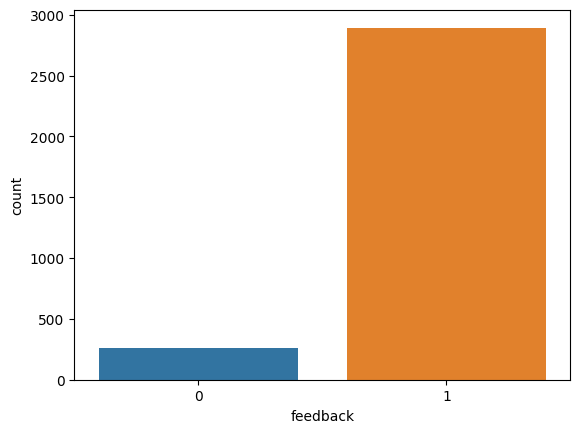

In [247]:
sns.countplot(x= data["feedback"])

In [248]:
# show the number of null values in data
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [249]:
#droup the null value in dataset
data = data.dropna()

In [250]:
#let's check if there is duplicate values
duplicates = data[data.duplicated()]
print(f'Number of duplicate rows: {len(duplicates)}')

Number of duplicate rows: 715


In [251]:
data.drop_duplicates(inplace=True)
if data.duplicated().sum()==0:   
    print('Duplicates Removed')
else:
    print('there is still duplicates')

Duplicates Removed


In [252]:
# show the number of null values in data After  remove the null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [253]:
data.shape

(2435, 5)

In [254]:
data["feedback"].value_counts()

1    2214
0     221
Name: feedback, dtype: int64

In [255]:
data.describe()

,rating,feedback
count,2435.000000,2435.000000
mean,4.435318,0.909240
std,1.109562,0.287326
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [256]:
print(data["verified_reviews"].value_counts())

                                                                                                                                                                                                                      50
Love it!                                                                                                                                                                                                              14
Love it                                                                                                                                                                                                               13
Great product                                                                                                                                                                                                          8
Works great!                                                                                                                        

In [257]:
# Length: refers to the number of characters, words, or sentences in a piece of text.

#Polarity and Subjectivity

data["length"] = data["verified_reviews"].apply(len)

data["length"]

0        13
1         9
2       195
3       172
4         5
       ... 
2796    441
2797    380
2798      4
2799     27
2800    122
Name: length, Length: 2435, dtype: int64

In [258]:
#Polarity refers to the sentiment or the degree of positivity or negativity in a piece of text. 
def get_polarity(text):
    textblob = TextBlob(str(text.encode("utf-8")))
    pol = textblob.sentiment.polarity
    return pol

#Subjectivity: Subjectivity refers to the degree of objectivity or subjectivity in a piece of text.
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode("utf-8")))
    pol = textblob.sentiment.subjectivity
    return pol

In [259]:
data["Polarity"] = data["verified_reviews"].apply(get_polarity)
data["Subjectivity"] = data["verified_reviews"].apply(get_subjectivity)

data[['length', 'Polarity', 'Subjectivity']].describe()

,length,Polarity,Subjectivity
count,2435.000000,2435.000000,2435.000000
mean,137.899384,0.347964,0.531035
std,192.397673,0.304757,0.254434
min,1.000000,-1.000000,0.000000
25%,31.000000,0.125000,0.422421
50%,77.000000,0.350000,0.585000
75%,170.500000,0.531905,0.697847
max,2851.000000,1.000000,1.000000


In [260]:
# Words , Characters and punctuation

data["charsCount"] = data["verified_reviews"].apply(len)
data["wordCount"] = data["verified_reviews"].apply(lambda x: len(x.split()))
data["word_density"] = data["charsCount"] / (data["wordCount"]+1)

data[['charsCount', 'wordCount', 'word_density']].describe()

,charsCount,wordCount,word_density
count,2435.000000,2435.000000,2435.000000
mean,137.899384,26.377413,4.635989
std,192.397673,36.443967,1.137202
min,1.000000,0.000000,0.500000
25%,31.000000,6.000000,4.285714
50%,77.000000,15.000000,4.818182
75%,170.500000,33.000000,5.214286
max,2851.000000,526.000000,32.500000


In [261]:
punctuation = string.punctuation

print(punctuation , end = "\n\n")

# calculating count of punctuation
data['punctuation_count'] = data['verified_reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

print(data[['charsCount', 'wordCount', 'word_density', 'punctuation_count']].describe())
print(data.head())

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

        charsCount    wordCount  word_density  punctuation_count
count  2435.000000  2435.000000   2435.000000        2435.000000
mean    137.899384    26.377413      4.635989           4.042710
std     192.397673    36.443967      1.137202           6.084976
min       1.000000     0.000000      0.500000           0.000000
25%      31.000000     6.000000      4.285714           1.000000
50%      77.000000    15.000000      4.818182           2.000000
75%     170.500000    33.000000      5.214286           5.000000
max    2851.000000   526.000000     32.500000         121.000000
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  length  \
0                                      Love my Echo!  

# Data Cleaning

In [262]:
#lower case
data['review'] = data['verified_reviews'].apply(lambda x:  x.lower())

data['review'].head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: review, dtype: object

In [263]:
# remove punctuations
def punctuation_removal(messy_text):
    clean_list = [char for char in messy_text if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal)

data['review'].head()

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my 4 y...
4                                                music
Name: review, dtype: object

In [264]:
# removing numbers

def numbers_removal(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d',i):
            list_text_new.append(i)
    return ''.join(list_text_new)


data['review'] = data['review'].apply(numbers_removal)

data['review'].head()

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my  yr...
4                                                music
Name: review, dtype: object

In [265]:
#Removing Emails
def remove_Emails(text):
    pattern=r'\S+@\S+'
    text=re.sub(pattern,'',text)
    return text

#Removing URLS
def remove_URLS(text):
    pattern=r'http\S+'
    text=re.sub(pattern,'',text)
    return text

data['review'] = data['review'].apply(remove_Emails ,remove_URLS )

data['review'].head()

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my  yr...
4                                                music
Name: review, dtype: object

In [266]:
# removing Special Characters & accents
!pip install unidecode
from unidecode import unidecode
def special_char_removal(text):
    pat = r'^[a-zA-Z0-9]'
    string = re.sub(pat,'',text[0]+text)
    return unidecode(string)

data['review'] = data.apply(lambda x:  special_char_removal(x['review']),axis=1)

data['review'].head()

Defaulting to user installation because normal site-packages is not writeable


0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my  yr...
4                                                music
Name: review, dtype: object

In [267]:
# Stop Words in nltk 
stop_word = set(STOPWORDS)
print(stop_word , end = '\n\n')
stop_words = set(stopwords.words('english'))
print(stop_words)

def remove_stopwords_custom(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords from the list of tokens
    tokens_filtere = [word for word in tokens if word.lower() not in stop_words]
    tokens_filtered = [word for word in tokens_filtere if word.lower() not in stop_word]
    # Join the list of tokens back into a single string
    text_filtered = ' '.join(tokens_filtered)
    # Remove additional unwanted characters using a decoding method
    text_filtered = text_filtered.encode('ascii', 'ignore').decode('utf-8')
    return text_filtered

data['review'] = data['review'].apply(remove_stopwords_custom)

{'wherever', 'whenever', 'some', 'every', 'nine', 'has', 'how', 'con', 'amongst', 'what', 'everywhere', 'unless', 'his', 'otherwise', 'detail', 'yours', 'while', 'whoever', 'the', 'that', 'hundred', 'us', 'mill', 'yet', 'perhaps', 'but', 'which', 'should', 'have', 'bottom', 'meanwhile', 'between', 'front', 'hereby', 'ie', 'toward', 'least', 'themselves', 'because', 'thin', 'sincere', 'two', 'find', 'thus', 'seeming', 'therein', 'together', 'show', 'yourselves', 'call', 'my', 'before', 'may', 'each', 'do', 'nothing', 'why', 'mostly', 'over', 'both', 'thereby', 'if', 'latterly', 'anyone', 'hereafter', 'within', 'per', 'across', 'cry', 'or', 'hence', 'were', 'against', 'own', 'from', 'ours', 'these', 'at', 'are', 'something', 'hereupon', 'we', 'whether', 'now', 'de', 'didn', 'by', 'whose', 'km', 'into', 'beyond', 'those', 'make', 'anywhere', 'any', 'fire', 'describe', 'who', 'namely', 'quite', 'among', 'full', 'up', 'however', 'along', 'other', 'hasnt', 'kg', 'seems', 'seem', 'indeed', 'e

In [268]:
data['review'].head()

0                                            love echo
1                                                loved
2    playing game answer question correctly alexa s...
3    lot fun thing yr old learns dinosaurs control ...
4                                                music
Name: review, dtype: object

In [269]:
# function for stemming

def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

data['review'] = data['review'].apply(get_stem)

In [270]:
data['review'].head()

0                                            love echo
1                                                 love
2    play game answer question correctli alexa say ...
3    lot fun thing yr old learn dinosaur control li...
4                                                music
Name: review, dtype: object

In [271]:
# !python -m spacy download en_core_web_sm
# function for lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')

def get_lem(text):
    text = nlp(text)
    lemmatized_sentence = " ".join([word.lemma_ for word in text])
    return lemmatized_sentence

    


data['review'] = data['review'].apply(get_lem)

In [272]:
data['review'].head()

0                                            love echo
1                                                 love
2    play game answer question correctli alexa say ...
3    lot fun thing yr old learn dinosaur control li...
4                                                music
Name: review, dtype: object

# Feature Extraction

In [273]:
# label encoder
from sklearn.preprocessing import LabelEncoder

labels = data['feedback']
encoder = LabelEncoder()
label = encoder.fit_transform(labels)
print(label)

[1 1 1 ... 1 1 1]


In [274]:
#bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer


cv = TfidfVectorizer(max_features=9000,ngram_range=(1,50))

X = cv.fit_transform(data['review']).toarray()


idf_values = cv.idf_


vocabulary = cv.vocabulary_


In [275]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split ( X , label , test_size= 0.2 ,shuffle= True )

In [276]:
X_train.shape

(1948, 9000)

# Bulid model 

In [290]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 1, input_shape=(9000,), activation='sigmoid'))
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid')) 
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])  

model = classifier.fit(
    X_train, 
    y_train,  
    epochs=55
    
)





Epoch 1/55
61/61 [==============================] - 1s 4ms/step - loss: 0.4601 - accuracy: 0.9117
Epoch 2/55
61/61 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.9117
Epoch 3/55
61/61 [==============================] - 0s 4ms/step - loss: 0.2934 - accuracy: 0.9117
Epoch 4/55
61/61 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.9117
Epoch 5/55
61/61 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.9117
Epoch 6/55
61/61 [==============================] - 0s 4ms/step - loss: 0.2841 - accuracy: 0.9117
Epoch 7/55
61/61 [==============================] - 0s 5ms/step - loss: 0.2804 - accuracy: 0.9117
Epoch 8/55
61/61 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.9117
Epoch 9/55
61/61 [==============================] - 0s 4ms/step - loss: 0.2696 - accuracy: 0.9117
Epoch 10/55
61/61 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.9117
Epoch 11/55
61/61 [

In [300]:
# # Convert the model to TensorFlow Lite format
# converter = tf.lite.TFLiteConverter.from_keras_model(classifier)
# tflite_model = converter.convert()

# # Save the TensorFlow Lite model to a file
# with open('my_model.tflite', 'wb') as file:
#     file.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\MAHMOU~1\AppData\Local\Temp\tmp4_elohn8\assets


INFO:tensorflow:Assets written to: C:\Users\MAHMOU~1\AppData\Local\Temp\tmp4_elohn8\assets


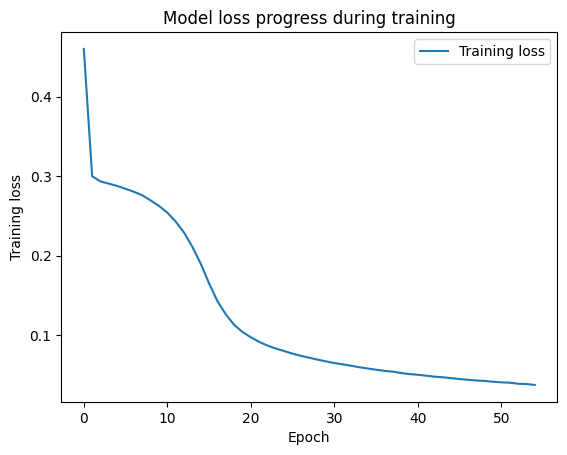

In [292]:
plt.plot(model.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

## Create Voting Model 

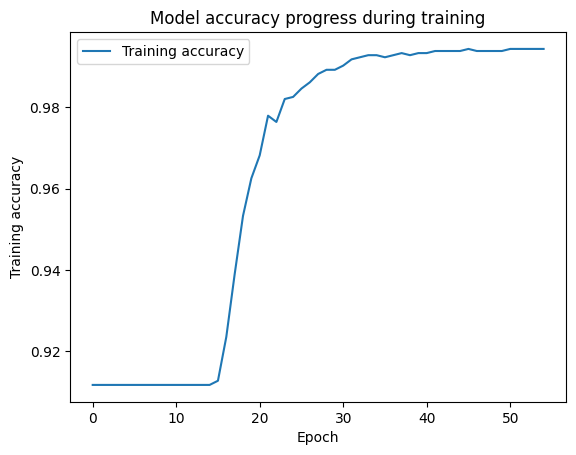

In [293]:
plt.plot(model.history['accuracy'])
plt.title('Model accuracy progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend(['Training accuracy'])

In [294]:
y_pred_test = classifier.predict(X_test)   
y_pred_test
print (y_pred_test[1:6])
y_pred_test = (y_pred_test > 0.5)


16/16 [==============================] - 0s 3ms/step
[[0.99995244]
 [0.99968696]
 [0.9999936 ]
 [0.6166297 ]
 [0.93020827]]


In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {round(accuracy * 100, 2)}%')

# Precision 
precision = precision_score(y_test, y_pred_test)
print(f'Precision: {round(precision * 100, 2)}%') 

# Recall 
recall = recall_score(y_test, y_pred_test)
print(f'Recall: {round(recall * 100, 2)}%')

# F1 score (harmonic mean of precision and recall)
f1 = f1_score(y_test, y_pred_test) 
print(f'F1 score: {round(f1 * 100, 2)}%')

Accuracy: 90.35%
Precision: 91.16%
Recall: 98.86%
F1 score: 94.85%


([<matplotlib.axis.YTick at 0x1a46d155490>,
 [Text(0, 0, ''), Text(0, 1, '')])

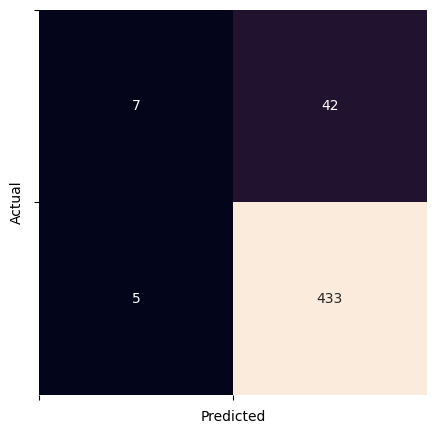

In [297]:
save("text_classifier.h5")

### save model

In [ ]:
import pickle


# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(ensemble_model , file)

### save vocabulary & idf_values

In [ ]:
import pickle

np.save('idf_values.npy', idf_values)

with open('vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)
    print('vocabulary saved successfully to file')